In [ ]:
import tensorflow as tf

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
cifar10 = tf.keras.datasets.cifar10

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
image = tf.cast(x_train[922], dtype=tf.float32) 

In [ ]:
# resize 
resize_layer = tf.keras.layers.experimental.preprocessing.Resizing(224, 224)

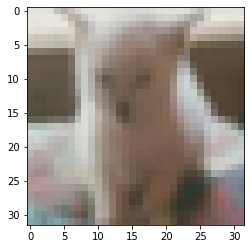

In [ ]:
plt.imshow(x_train[922])

In [ ]:
x_train[922].shape

(32, 32, 3)

In [ ]:
import numpy as np

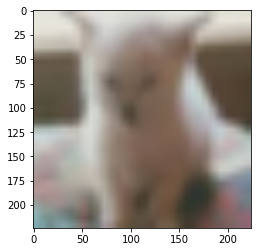

In [ ]:
plt.imshow(resize_layer(x_train[922]).numpy().astype(np.int64))

In [ ]:
# Data Augmentation 
# 회전, 반전
resize_layer = tf.keras.layers.experimental.preprocessing.Resizing(224, 224)
rotate_layer = tf.keras.layers.experimental.preprocessing.RandomRotation(0.2 )
flip_layer = tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal')

In [ ]:
image = tf.cast(x_train[922], dtype=tf.float32) 

In [ ]:
image = image[tf.newaxis, ...]

In [ ]:
rotated = rotate_layer(image)
fliped = flip_layer(image)

In [ ]:
flip2 = flip_layer(rotated)

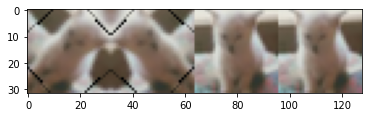

In [ ]:
plt.imshow(np.hstack([rotated[0].numpy().astype(np.int64),
                      flip2[0].numpy().astype(np.int64), 
                      fliped[0].numpy().astype(np.int64), 
                      x_train[922]])) 

In [ ]:

# resize_layer = tf.keras.layers.experimental.preprocessing.Resizing(224, 224)
# rotate_layer = tf.keras.layers.experimental.preprocessing.RandomRotation(0.2 )
# flip_layer = tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal')

data_preprocessing = tf.keras.models.Sequential([
  tf.keras.layers.experimental.preprocessing.Resizing(100, 100),
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255.0),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2 ),
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal')
])

In [ ]:
processed = data_preprocessing(image)

In [ ]:
processed.shape  

TensorShape([1, 224, 224, 3])

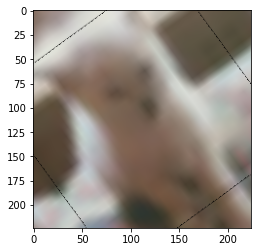

In [ ]:
plt.imshow(processed[0].numpy()) 

In [ ]:
base_model = tf.keras.applications.VGG16(input_shape=(100,100,3),
                                         weights='imagenet', include_top=False)

In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
pre_test = data_preprocessing(x_test[:5])

In [ ]:
pre_test2 = base_model(pre_test)

In [ ]:
gap_layer = tf.keras.layers.GlobalAveragePooling2D()

In [ ]:
pre_test3 = tf.keras.layers.GlobalAveragePooling2D()(pre_test2)

In [ ]:
output_layers = tf.keras.models.Sequential([
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
inputs = tf.keras.Input(shape=(32,32,3))
x = data_preprocessing(inputs) 
x = base_model(x)
outputs = output_layers(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
sequential (Sequential)      (None, 224, 224, 3)       0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
sequential_2 (Sequential)    (None, 10)                104610    
Total params: 14,819,298
Trainable params: 104,610
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
test_result = model(x_test[:5])

In [ ]:
np.argmax(test_result, axis=1), y_test[:5]

(array([1, 1, 1, 1, 1]), array([[3],
        [8],
        [8],
        [0],
        [6]], dtype=uint8))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1193/1563 [=====================>........] - ETA: 48s - loss: 1.3424 - accuracy: 0.5230

KeyboardInterrupt: ignored